## Installation

In [0]:
pip install -q tensorflow tensorflow-datasets

## Import Necessary Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Find Datasets

In [0]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

## Get information on the Data

In [0]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Prepare Rock, Paper, Scissors Data

In [0]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteVUSL9W/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteVUSL9W/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## Show Examples

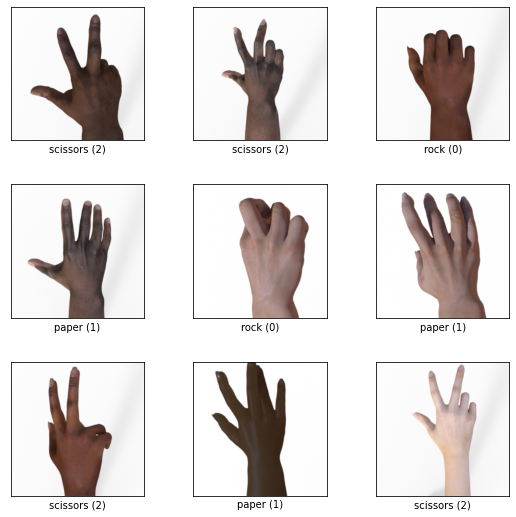

In [0]:
fig = tfds.show_examples(info, ds_train)

## Additional Data Prep

In [0]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [0]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

(300, 300, 1)

## Train a network (basic approach)

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 24s 306ms/step - loss: 20.9577 - accuracy: 0.4563
Epoch 2/5
79/79 [==============================] - 24s 305ms/step - loss: 1.5840 - accuracy: 0.6619
Epoch 3/5
79/79 [==============================] - 24s 305ms/step - loss: 1.6209 - accuracy: 0.6706
Epoch 4/5
79/79 [==============================] - 23s 288ms/step - loss: 0.6419 - accuracy: 0.8310
Epoch 5/5
79/79 [==============================] - 24s 308ms/step - loss: 0.3114 - accuracy: 0.8917


In [0]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 74ms/step - loss: 2.1391 - accuracy: 0.5081


[2.13912034034729, 0.5080645084381104]

## Train a Network (convolutional approach)

In [0]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 8s 103ms/step - loss: 4.3401 - accuracy: 0.7048
Epoch 2/5
79/79 [==============================] - 8s 99ms/step - loss: 0.4482 - accuracy: 0.9016
Epoch 3/5
79/79 [==============================] - 8s 98ms/step - loss: 0.2057 - accuracy: 0.9480
Epoch 4/5
79/79 [==============================] - 8s 99ms/step - loss: 0.0267 - accuracy: 0.9937
Epoch 5/5
79/79 [==============================] - 8s 99ms/step - loss: 0.0071 - accuracy: 0.9996


In [0]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 43ms/step - loss: 2.6121 - accuracy: 0.4758


[2.612107038497925, 0.47580644488334656]

## A Better Convolutional Network

In [0]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 1s 17ms/step - loss: 0.7607 - accuracy: 0.7353
Epoch 2/5
79/79 [==============================] - 1s 17ms/step - loss: 0.0931 - accuracy: 0.9786
Epoch 3/5
79/79 [==============================] - 1s 17ms/step - loss: 0.0104 - accuracy: 0.9972
Epoch 4/5
79/79 [==============================] - 1s 17ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 5/5
79/79 [==============================] - 1s 17ms/step - loss: 0.0011 - accuracy: 1.0000


In [0]:
model.evaluate(test_images,test_labels)

## Hyperparameter Tuning

In [0]:
pip install -U keras-tuner

In [0]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 3s 43ms/step - loss: 0.9874 - accuracy: 0.6770 - val_loss: 1.0167 - val_accuracy: 0.5296
Epoch 2/10
79/79 [==============================] - 3s 38ms/step - loss: 0.1578 - accuracy: 0.9591 - val_loss: 1.0066 - val_accuracy: 0.6747
Epoch 3/10
79/79 [==============================] - 3s 39ms/step - loss: 0.0580 - accuracy: 0.9869 - val_loss: 1.1765 - val_accuracy: 0.6909
Epoch 4/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0631 - accuracy: 0.9825 - val_loss: 1.0420 - val_accuracy: 0.4624
Epoch 5/10
79/79 [==============================] - 2s 23ms/step - loss: 0.3522 - accuracy: 0.8500 - val_loss: 1.0036 - val_accuracy: 0.5699
Epoch 6/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0900 - accuracy: 0.9730 - val_loss: 1.2060 - val_accuracy: 0.6720
Epoch 7/10
79/79 [==============================] - 3s 37ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 1.2661 - val_accuracy: 0.7016
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 0.7669 - accuracy: 0.7421 - val_loss: 0.8337 - val_accuracy: 0.6774
Epoch 2/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0984 - accuracy: 0.9770 - val_loss: 0.9933 - val_accuracy: 0.6801
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0160 - accuracy: 0.9976 - val_loss: 1.2007 - val_accuracy: 0.6747
Epoch 4/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2049 - val_accuracy: 0.6909
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.4265 - val_accuracy: 0.6747
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.7626 - val_accuracy: 0.6667
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 6.6260e-04 - accuracy: 1.0000 - val_loss: 1.7962 - val_accuracy: 0.6720
Epoch 8/1

Epoch 1/10
79/79 [==============================] - 6s 70ms/step - loss: 1.0356 - accuracy: 0.7115 - val_loss: 0.8544 - val_accuracy: 0.6962
Epoch 2/10
79/79 [==============================] - 22s 273ms/step - loss: 0.0434 - accuracy: 0.9940 - val_loss: 1.0690 - val_accuracy: 0.7285
Epoch 3/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 1.4497 - val_accuracy: 0.6747
Epoch 4/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 1.4929 - val_accuracy: 0.6909
Epoch 5/10
79/79 [==============================] - 15s 191ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 1.3729 - val_accuracy: 0.7339
Epoch 6/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.5601 - val_accuracy: 0.7177
Epoch 7/10
79/79 [==============================] - 2s 29ms/step - loss: 4.2914e-04 - accuracy: 1.0000 - val_loss: 1.8698 - val_accuracy: 0.6828
Epoch

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 0.7652 - accuracy: 0.6921 - val_loss: 0.7801 - val_accuracy: 0.6452
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0886 - accuracy: 0.9821 - val_loss: 0.7892 - val_accuracy: 0.6882
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.9907 - val_accuracy: 0.7070
Epoch 4/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 1.1458 - val_accuracy: 0.7043
Epoch 5/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1270 - val_accuracy: 0.7285
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3665 - val_accuracy: 0.7070
Epoch 7/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4247 - val_accuracy: 0.7016
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 27ms/step - loss: 0.7525 - accuracy: 0.7202 - val_loss: 0.7620 - val_accuracy: 0.6720
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0760 - accuracy: 0.9829 - val_loss: 0.9959 - val_accuracy: 0.6263
Epoch 3/10
79/79 [==============================] - 2s 27ms/step - loss: 0.0222 - accuracy: 0.9944 - val_loss: 0.9535 - val_accuracy: 0.6882
Epoch 4/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0060 - accuracy: 0.9996 - val_loss: 1.2290 - val_accuracy: 0.6452
Epoch 5/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.9438 - val_accuracy: 0.6694
Epoch 6/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 1.3779 - val_accuracy: 0.7231
Epoch 7/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.9680 - val_accuracy: 0.5699
Epoch 8/10
79

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [0]:
best_model = tuner.get_best_models()[0]

In [0]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 1.3729 - accuracy: 0.7339


[1.3729289770126343, 0.7338709831237793]

In [0]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 99, 99, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 70688)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7

In [0]:
tuner.results_summary()

# Miscellaneous Useful Techniques
## Save & Load our Models


In [0]:
best_model.save('./my_model')

In [0]:
loaded_model = keras.models.load_model('./my_model')

In [0]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 12ms/step - loss: 1.3729 - accuracy: 0.7339


[1.3729289770126343, 0.7338709831237793]

## Plot Image from Numpy Array

(300, 300, 3)

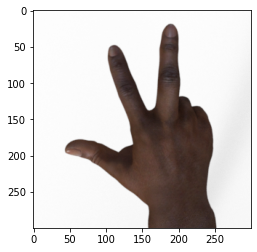

In [0]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)

rgb_image.shape

## Use Model to Predict Result for Single Example

In [0]:
result = best_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

array([[4.5396062e-15, 1.5290578e-12, 1.0000000e+00]], dtype=float32)

## Convert PNG/JPG images to Numpy Format

In [0]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Massachusetts_State_House_-_panoramio_%281%29.jpg/280px-Massachusetts_State_House_-_panoramio_%281%29.jpg')

print(type(im))

im_np = np.asarray(im)

print(im_np.shape)

<class 'imageio.core.util.Array'>
(186, 280, 3)
